packages
====================

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display
import time

determinant
================

the singular matrix (reduced-matrix) has a determinant of 0, but...

In [9]:
m = 30
A = np.random.randn(m, m)
A[:,0] = A[:, 1]
print(np.linalg.det(A))

-2.6347788640126426


so, don't use det to test for matrix singularity  
Let's explore more: swap the row

In [11]:
A = np.random.randn(6, 6)
print(np.linalg.det(A))

# swap a row
As = A[[1, 0, 2, 3, 4, 5], :]
print(np.linalg.det(As))

Ass = A[[1, 0, 2, 4, 3, 5], :]
print(np.linalg.det(Ass))



-7.046112617863621
7.046112617863621
-7.046112617863621


determinant of shifting
==============================
shifting is $M = M + \lambda I$

In [13]:
lambdas = np.linspace(0, 0.1, 30)
lambdas

array([0.        , 0.00344828, 0.00689655, 0.01034483, 0.0137931 ,
       0.01724138, 0.02068966, 0.02413793, 0.02758621, 0.03103448,
       0.03448276, 0.03793103, 0.04137931, 0.04482759, 0.04827586,
       0.05172414, 0.05517241, 0.05862069, 0.06206897, 0.06551724,
       0.06896552, 0.07241379, 0.07586207, 0.07931034, 0.08275862,
       0.0862069 , 0.08965517, 0.09310345, 0.09655172, 0.1       ])

In [14]:
tmp = np.zeros(1000)
dets = np.zeros(len(lambdas))

for deti in range(len(lambdas)):

    # run 1000 iterations
    for i in range(1000):

        # generate a matrix
        M = np.random.randn(20, 20)
        M[:,0] = M[:,1]

        # compute the determinant
        tmp[i] = abs(np.linalg.det( M + lambdas[deti] * np.eye(20)))
    
    dets[deti] = np.mean(tmp)

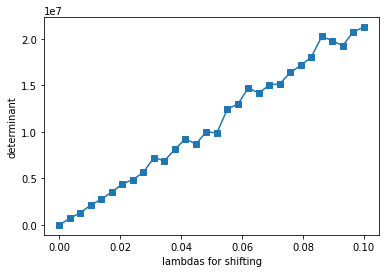

In [15]:
plt.plot(lambdas, dets, 's-')
plt.xlabel('lambdas for shifting')
plt.ylabel('determinant')
plt.show()

determinant of multiplication

In [16]:
A = np.random.randn(3, 3)
B = np.random.randn(3, 3)
AB = A@B

print(np.linalg.det(A), np.linalg.det(B), np.linalg.det(A)*np.linalg.det(B),
      np.linalg.det(AB))

-0.1806449302051861 -2.2536650473672117 0.4071131651875174 0.4071131651875158


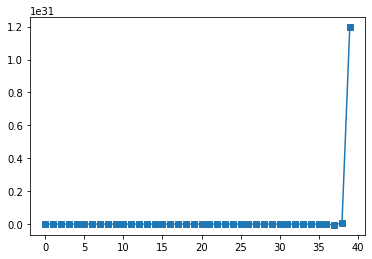

In [18]:
dets = np.zeros((40, 2))

for k in range(40):
    A = np.random.randn(k, k)
    B = np.random.randn(k, k)
    AB = A@B

    dets[k, 0] = np.linalg.det(A) * np.linalg.det(B)
    dets[k, 1] = np.linalg.det(AB)

plt.plot(dets[:,0]-dets[:,1],'s-')
plt.ylim([-1,1])
plt.show()